# X-Risk Estimation

In this notebook we use the data from the [Exploratory Data Analysis]('./x-risk-eda.ipynb') (EDA) and create a survival model. 

From other notebooks, we obtained weighted risk estimates based on estimates from multiple people. But what can we do with these probabilities? A probability, though sometimes useful to highlight how an event is more likely to occur than another, is still somewhat vague and opaque. 

## Motivation

Matters such as the extinction risk of humanity are kind of a big deal, I find. And what these estimates do is reduce those complex matters to a number, a number that is comparable to the odds of your favorite team scoring x points, or a horse winning a race. It might trivialize the odds, and it might give us a false sense of security.

These estimates are good for us to gauge our current risk of peril, but I find that looking at them in the context of humanity's potential future would be a good way to put things into perspective. It might give us a much-needed sense of urgency to reduce existential risk, and it might help us to prioritize.

So this is a little experiment to play around with the math, and see what comes out, maybe an interesting insight, and if not, at least it was fun.

This is mostly purely a mathematical game, we take some numbers in, do some computations and get a different set of numbers out. But it might end up being at least somewhat illustrative regarding our situation, and it might point out to the most important steps for humanity to take now.

## The Problem

Given that [humanity's potential to flourish is so incredibly vast](https://thoughtroamer.substack.com/p/the-extinction-game), what are our odds of fulfilling that potential? What are the odds that we're wiped out before reaching that potential?

We want to embark in an exploration into existential risk. Particularly, we want to investigate how long we can expect humanity to still be around, given different existential risk levels. We can, of course, use current existential risk estimates, and see where that takes us, and we can also use varying levels, to see what would happen if we let them increase or if we get to work and successfully reduce them.

So the goal is simple, we'll come up with different models for humanity's survival, and we use current X-Risk estimates to investigate how long we'd be expected to last given those risk levels. We can also ask how much risk we should tolerate, given our vast potential. And we might also investigate how our "life expectancy" might change by parting from different X-Risk levels.

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as srs
import pandas as pd
from matplotlib.ticker import FuncFormatter
import time

from the_extinction_game.models.single_risk_binary_tree import build_xrisk_tree, estimate_simulation_runtime, run_survival_simulation
from the_extinction_game.reporting import plot_survival_analysis
from the_extinction_game.models.multi_risk_binary_tree import MultiRiskBinaryTreeModel
from the_extinction_game.experiment import Experiment

# Setup seaborn
srs.set_theme()

## The Extinction Game

Here, we will try to model the problem in different ways, starting from simple models to more complex ones.

Broadly the whole modeling is based on what I call "The Extinction Game" - yes, it's a dramatic subject. It's a game that involves the whole of humanity. In it, humanity *wins* and goes on for a long time in a desirable state of flourishing, thus fulfilling its potential. Or it *loses*, destroying its potential to flourish.

What exactly means to lose is debatable; it could either mean civilization's collapse, or extinction. However, the most generic scenario is one where *humanity's potential to flourish* is destroyed. This could be either due to full-fledged extinction, or it could be the establishment of an ultra stable dystopia that lasts for millions of years, or civilization's collapse without the ability to recover, without the extinction of Homo Sapiens.

For brevity and clarity I'll use the term "extinction" to refer to the *losing* scenarios, even though it isn't necessarily synonymous with extinction.

We'll start with the independent risk model. A model that assumes that every century is independent where we compound the risk over the centuries.


# Level 1 - Disjoint Events with Constant Total Risk

This is the simplest model. In it, humanity's existential risk is modeled as a probability cascade, where the extinction game is played every century, and every century is independent - meaning that the outcome in one century doesn't affect the game in other centuries. We also use a constant figure for total risk. 

Though this model has the downside of modeling each century as independent - which they're arguably not - it could serve as a "business as usual" scenario, where risk levels are maintained, reflecting a lack of effort to actively reduce them, or just enough effort to not let them increase.

To describe the problem we introduce the following events and expressions:

- $E$: Extinction in a randomly chosen century
- $E_n$: Extinction after $n$ centuries
- $S$: Survival in a randomly chosen century
- $S_n$: Survival after $n$ centuries
- $P(E)$: Probability of extinction in a randomly chosen century
- $P(S)$: Probability of survival in a randomly chosen century
- $P(E_n)$: Probability of extinction after $n$ centuries
- $P(S_n)$: Probability of survival after $n$ centuries

We can establish the relationships between $P(E)$, $P(S)$, $P(E_n)$, and $P(S_n)$.

First we assume that $P(S)$ and $P(E)$ are complementary and mutually exclusive. Either there is or isn't an extinction event in a randomly chosen century. And similarly, after $n$ centuries, either there has been or there hasn't been an extinction event, so $P(E_n)$, and $P(S_n)$ are also mutually exclusive and complementary.

$$
\begin{aligned}
P(S) &= 1 - P(E) \\
P(S_n) &= 1 - P(E_n)
\end{aligned}
$$

To model the survival probability after $n$ centuries, we can just multiply the survival probability $n$ times, or raise it to the power of $n$:

$$
\begin{aligned}
P(S_n) &= P(S)^n \\
P(S_n) &= \left[1 - P(E) \right]^n
\end{aligned}
$$

The expression $P(S_n)$ tells us then that the probability of survival after $n$ centuries is the complementary existential risk ($1-P(E)$) raised to the power of $n$.

We've now modeled the survival probability in a very simple way. How does our survival likelihood look like when using current X-Risk estimates?

# Understanding the Independent Risk Model

The independent risk model is a framework for thinking about humanity's long-term survival prospects in the face of various existential risks. Here's how it works:

## The Basic Concept

Imagine humanity playing a high-stakes game each century. In this game:

- Each century represents one "round" of play
- We either survive the century (win) or face an existential catastrophe (lose)
- Once we lose, the game is over - there are no second chances
- The probability of losing in any given century is our "existential risk" for that century

## Key Assumptions

The model makes several important simplifying assumptions:

1. **Independence**: Each century's outcome is independent of previous centuries. This means the probability of surviving (or not) in one century doesn't affect the probabilities in future centuries.

2. **Constant Risk**: The model assumes the risk level remains constant across centuries (though in reality, we might reduce risks over time through technological and social progress).

3. **Binary Outcomes**: The model treats survival as binary - we either continue existing or face an existential catastrophe. It doesn't account for partial degradations of humanity's potential.

## The Mathematics

The mathematics of the model are based on probability theory:

1. **Single Century Survival**: If our existential risk for a century is p, our probability of surviving that century is (1-p)

2. **Multi-Century Survival**: To survive n centuries, we need to survive each century in sequence. The probability is therefore (1-p)ⁿ

3. **Expected Survival Time**: The expected number of centuries until extinction can be calculated using the geometric distribution formula: 1/p

4. **Confidence Levels**: For any given confidence level c, we can calculate how long we can expect to survive with that level of confidence using the formula: log(1-c)/log(1-p)

## Practical Implications

The model reveals several important insights:

1. **Compound Risk**: Even small per-century risks become very dangerous over long timeframes. A 1% risk per century means we only have about a 13% chance of surviving 200 centuries.

2. **Required Risk Levels**: To have high confidence in long-term survival, we need extremely low per-century risks. For example, to have a 99% chance of surviving for 2 billion years, we need to reduce existential risk to about 5 in 1 trillion per century.

3. **Progressive Risk Reduction**: While achieving such low risk levels might seem impossible, we don't need to do it all at once. Each century of survival gives us an opportunity to further reduce risks for future centuries.

## Limitations

The model has several important limitations:

1. **Simplification**: Real existential risks are not independent - they interact with each other and may change over time.

2. **Static Nature**: The model doesn't account for humanity's ability to reduce risks over time through technological and social progress.

3. **Binary Treatment**: It doesn't capture partial degradations of human potential or different types of existential catastrophes.

4. **Temporal Dependence**: In reality, historical events and trends influence future risks, violating the independence assumption.

Despite these limitations, the model provides a useful framework for thinking about long-term existential risk and the importance of risk reduction efforts.

## Practical Applications

The model can be used to:

1. Set risk reduction targets for different timeframes and confidence levels
2. Compare different risk mitigation strategies based on their impact on per-century risk
3. Make the case for investing in risk reduction efforts
4. Understand the magnitude of risk reduction needed for long-term survival

The key takeaway is that ensuring humanity's long-term survival requires getting existential risks down to extremely low levels, but we can work on this gradually over time rather than all at once.

In [2]:
# Load x-risk estimate data.
df = pd.read_csv('./data/processed_estimates/summary_estimates.csv')
df.describe()

,mean,weighted_mean,confidence_weight_mean,median,std,count,q1,q3,iqr,geometric_mean,weighted_geometric_mean
count,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,0.054429,0.053682,0.801167,0.031587,0.069163,8.100000,1.190801e-02,0.077932,0.066024,0.020237,0.021596
std,0.065556,0.065715,0.094558,0.048928,0.072112,5.896327,1.810331e-02,0.101514,0.088646,0.029553,0.031875
min,0.000979,0.000881,0.666667,0.000001,0.002549,1.000000,5.650000e-07,0.000046,0.000000,0.000003,0.000002
25%,0.005758,0.005892,0.728535,0.003624,0.010398,4.000000,6.600000e-04,0.009813,0.007827,0.002068,0.001831
50%,0.022475,0.021854,0.786184,0.008675,0.022473,7.500000,2.366250e-03,0.022512,0.019150,0.004760,0.004905
75%,0.103197,0.101102,0.875000,0.025462,0.152058,10.500000,1.662500e-02,0.158375,0.142187,0.021525,0.021505
max,0.161579,0.160972,0.928571,0.142000,0.170602,19.000000,5.000000e-02,0.250000,0.200000,0.080536,0.084158


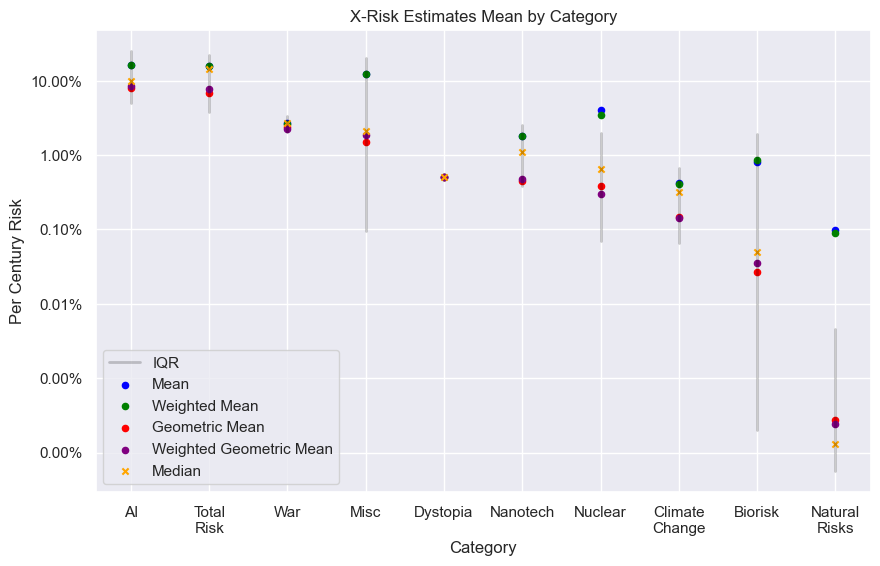

In [3]:
df_sorted = df.sort_values(by='geometric_mean', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in df_sorted.iterrows():
  ax.plot([row['category_alias'], row['category_alias']], [row['q1'], row['q3']], color='black', linewidth=2, label='IQR' if i == 0 else '', alpha=0.2)

df_sorted.plot(kind='scatter', x='category_alias', y='mean', color='blue', label='Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='weighted_mean', color='green', label='Weighted Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='geometric_mean', color='red', label='Geometric Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='weighted_geometric_mean', color='purple', label='Weighted Geometric Mean', ax=ax)
df_sorted.plot(kind='scatter', x='category_alias', y='median', color='orange', label='Median', ax=ax, marker='x')

ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
ax.set_title('X-Risk Estimates Mean by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Per Century Risk')

# Combine legends
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='lower left')
plt.show()


In the notebook where we performed the EDA, we estimated weighted arithmetic and geometric means. Since the data has a wide spread, we'll use the weighted geometric means, since they are less affected by outliers, and they're mostly within the interquartile range (IQR).

In [4]:
# Implement simple constant risk model
def probability_of_survival_after_n_centuries(n, xrisk):
    """
    Calculate the probability of survival after a given number of centuries, 
    assuming a constant annual existential risk.

    Parameters:
    n (int): The number of centuries.
    xrisk (float): The annual existential risk (probability of extinction per year).

    Returns:
    float: The probability of survival after n centuries.
    """
    return (1 - xrisk) ** n

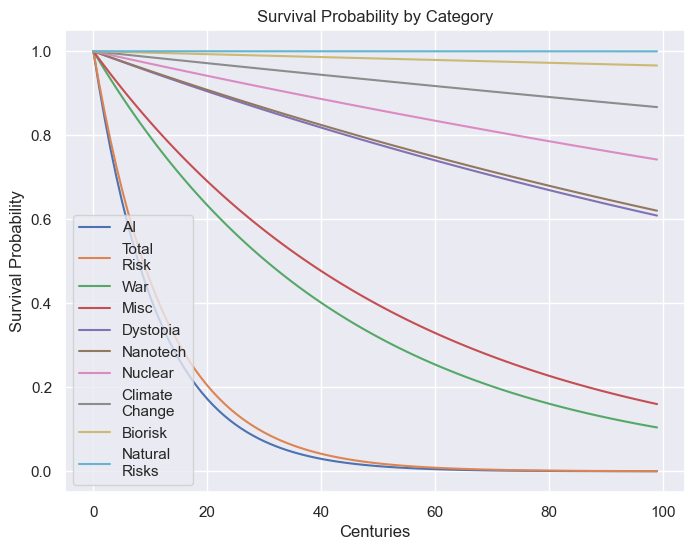

In [5]:
# Plot the probability of survival after 10 centuries for the different risk categories.
n = np.arange(0, 100)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the survival probability for each category
survival_probs_100 = []
for index, data in df_sorted.iterrows():
    survival_prob = probability_of_survival_after_n_centuries(n, data['weighted_geometric_mean'])
    survival_probs_100.append((data['category_alias'], survival_prob[-1]))
    category = data['category_alias']
    ax.plot(n, survival_prob, label=category)

ax.set_ylabel('Survival Probability')
ax.set_xlabel('Centuries')
ax.set_title('Survival Probability by Category')

ax.legend(loc='lower left')
plt.show()

In [6]:
for prob in survival_probs_100:
    print(f"P(S_100) for {prob[0].replace('\n', ' ')}: {prob[1]:.2%}")

P(S_100) for AI: 0.02%
P(S_100) for Total Risk: 0.04%
P(S_100) for War: 10.44%
P(S_100) for Misc: 16.01%
P(S_100) for Dystopia: 60.88%
P(S_100) for Nanotech: 62.04%
P(S_100) for Nuclear: 74.22%
P(S_100) for Climate Change: 86.71%
P(S_100) for Biorisk: 96.61%
P(S_100) for Natural Risks: 99.98%


## Observations on Survival Probability of Disjoint Centuries

We can see that broadly, the risk categories are grouped in at least three categories. There are the x-risks with the lowest estimates Dystopia, Nanotech, Nuclear, Climate Change, Biorisk, and Natural Risk, which result in the highest survival probabilities after 100 centuries - or 10,000 years, from about 60 to almost 100%.

War and Misc show survival probabilities of 10 and 16%, while AI and Total Risk give us almost zero chance to still be around after 10.000 years.

Until now, I hadn't realized that there's a curious inconsistency in the dataset: the total risk is *lower* than AI risk, which doesn't really make logical sense. How can be the total risk, which is supposed to contain all other risks, be lower than one of its constituents? This is a strong indication of uncertainty among the estimators. Total risk should be at least as high as the highest risk.

Below a few other important points:

1. The clustering is notable:
- High survival probability (60-100%): Natural risks through nuclear risks
- Medium survival probability (10-20%): War and miscellaneous risks  
- Near-zero survival probability (<1%): AI and total risk

1. Interesting patterns:
- Total risk closely tracks AI risk, suggesting AI dominates overall existential risk estimates
- Natural risks show remarkably high survival probability, reflecting confidence in our ability to handle known threats

1. Potential biases to consider:
- Newer risks (AI, nanotech) may have wider uncertainty ranges than traditional risks
- Historical data availability affects confidence - natural risks are better understood than emerging technologies
- Interdependencies between risks aren't captured (e.g., how war might affect AI development)

1. Methodological note:
The exponential decay in survival probability over centuries assumes risks are independent over time, which may not hold true. Some risks might decrease with technological advancement while others increase.

The stark difference between AI/total risk and other categories suggests experts view artificial intelligence as uniquely challenging compared to other existential risks humanity has faced.


## So, how long?

We're still talking about probabilities. We actually wanted to estimate how long we can expect to be around. So we might need a different calculation, especially one that takes into consideration humanity's long-term potential.

We can now investigate, given an existential risk level, how long we can be around with a certain probability. For instance, we can ask how long can we expect to be around with a probability of at least 90%? The probability to still be around we can choose relatively arbitrarily, so $P(S_n)$ becomes a constant, and we could solve for $n$, the number of centuries we expect to be around.

$$
\begin{aligned}
P(S_n) &= P(S)^n \notag \\
\log(P(S_n)) &= n \cdot \log(P(S)) \notag \\
n &= \frac{\log[P(S_n)]}{\log[P(S)]} \notag \\
n &= \frac{\log[P(S_n)]}{\log[1 - P(E)]}
\end{aligned}
$$

What the life expectancy then, if we wanted a probability of survival to remain higher than, say 90, 99, or 99.9%? In other words, having different levels of "certainty" about our survival, how long can we expect to be around?

In [7]:
def compute_life_expectancy(xrisk, survival_probability):
    """
    Calculate the life expectancy in centuries given an annual existential risk and a survival probability.

    Parameters:
    xrisk (float): The annual existential risk (probability of extinction per year).
    survival_probability (float): The probability of survival after n centuries.

    Returns:
    float: The life expectancy in centuries.
    """

    return np.log(survival_probability) / np.log(1 - xrisk)


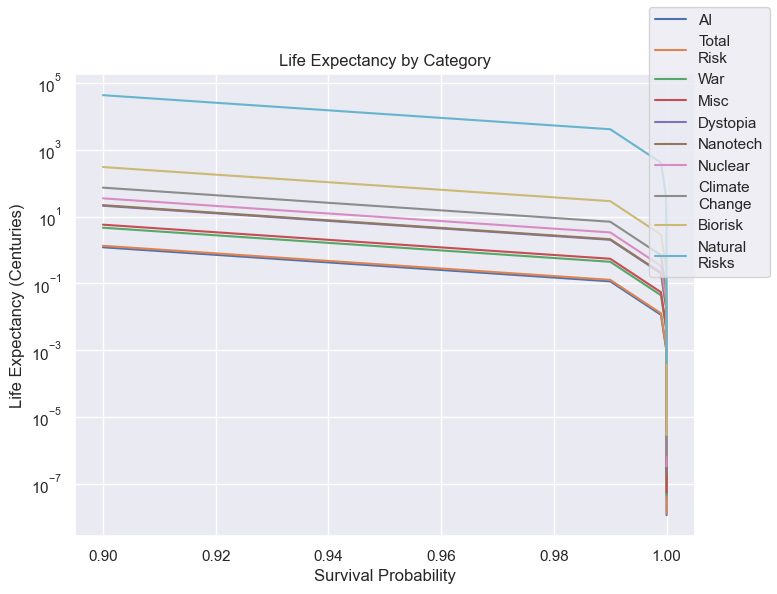

In [8]:

survival_probabilities = [1 - 1/np.pow(10, x) for x in range(1, 10)]

# Plot the life expectancy for the different risk categories.
fig, ax = plt.subplots(figsize=(8, 6))
for index, data in df_sorted.iterrows():
    life_expectancy = compute_life_expectancy(data['weighted_geometric_mean'], survival_probabilities)
    ax.plot(survival_probabilities, life_expectancy, label=data['category_alias'])

ax.set_yscale('log')
ax.set_ylabel('Life Expectancy (Centuries)')
ax.set_xlabel('Survival Probability')
ax.set_title('Life Expectancy by Category')

fig.legend()
plt.show()

## Observations regarding life expectancy

The life expectancy plot reveals several insights:

1. Scale and Grouping:
- Natural risks show highest life expectancy (~10^4 centuries)
- Middle cluster (biorisk through nuclear) around 10-100 centuries
- Lowest group (AI/total risk) below 1 century
- Log scale emphasizes the dramatic differences between categories

2. Probability Relationship:
- Sharp drop-off near 100% survival probability for all categories
- More gradual decline at lower probabilities
- Natural log relationship between survival probability and expected lifespan

3. Critical Implications:
- Even small differences in per-century risk compound dramatically
- AI and total risk estimates suggest <1 century expected survival at high confidence
- Traditional risks (natural disasters, nuclear) allow for much longer timescales

4. Methodological Note:
The steep decline at high probabilities suggests getting very high confidence in long-term survival requires dramatic risk reduction across all categories.

## Summary for Probability Cascade Model

Our initial exploration using a simple probability cascade model has revealed some insights about humanity's potential future. By treating each century as an independent roll of the dice with fixed odds of survival, we've seen how different existential risks could affect our long-term prospects.

The results paint a sobering picture: while we appear relatively well-equipped to handle traditional threats like natural disasters (with survival probabilities extending to tens of thousands of years), emerging technologies — particularly artificial intelligence — present a more immediate challenge. The model suggests that under current AI risk estimates, achieving high-confidence long-term survival becomes remarkably difficult, with timescales compressed to less than a century.

It is also notable that, as mentioned above, total risk is lower than AI risk, which doesn't really make too much sense, since the total risk should be at least as high as the highest 'isolated' risk.

However, this simple model has clear limitations. Real-world risks don't remain static, nor do they operate independently. As we develop new technologies, some risks might decrease while others emerge or intensify. The decisions we make today could dramatically alter the risk landscape of tomorrow.

This brings us to our next steps. We'll explore two more sophisticated approaches to modeling humanity's future:
First, we'll develop a dynamic risk tree model that captures how risks evolve over time. This will help us understand how technological progress and human decisions might create branching paths toward different futures, some safer than others.

Then, we'll investigate how different risks interact through a conditional probability model. Using our existing work on risk correlations, we'll examine how reducing one type of risk might affect others—for instance, how advancing AI safety might influence other technological risks, or how global cooperation on one challenge might help address others.
These more complex models should give us a richer understanding of the challenges we face and the potential paths toward securing humanity's long-term flourishing.

# X-Risk Tree

In this model we explore the future of humanity using a probability tree. The tree allows us to explore what would happen to humanity if the risk increases, decreases, or remains more or less constant through the centuries.

We start from our current century, at current risk levels. In the next century, X-Risk can increase or decrease by a fixed amount $\alpha$. We now have two possible worlds, one in which the risk increases, and one in which the risk decreases, in both cases by a factor $\alpha$. These two worlds will in turn split again into four possible worlds, one in which the risk has increased twice, one in which the risk has decreased twice, and two worlds where it has increased and decreased once, remaining more or less constant.

After building the X-Risk tree, we can run a Monte-Carlo simulation to find out what portion of civilizations are still alive after $n$ centuries.

In [9]:
# Calculate the estimated simulation time for a range of values.
centuries_range = np.arange(1, 20)
n_simulations_range = np.logspace(3, 6, num=10, base=10)

# Calculate the estimated simulation time for each combination of centuries and n_simulations.
simulation_times = []

for centuries in centuries_range:
    for n_simulations in n_simulations_range:
        simulation_times.append(estimate_simulation_runtime(centuries, n_simulations))

In [10]:
df_simulation_times = pd.DataFrame(simulation_times, index=pd.MultiIndex.from_product([centuries_range, n_simulations_range], names=['Centuries', 'Simulations']))
df_simulation_times['estimated_runtime_minutes'] = df_simulation_times['estimated_runtime_seconds'] / 60

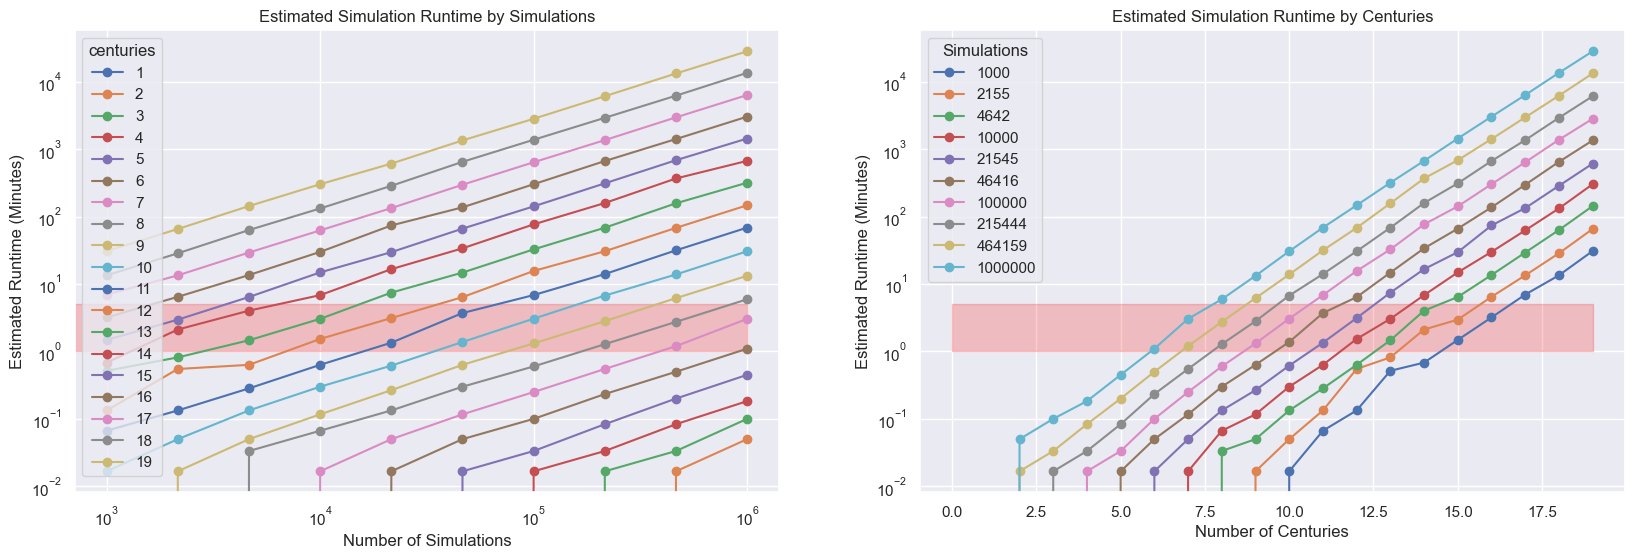

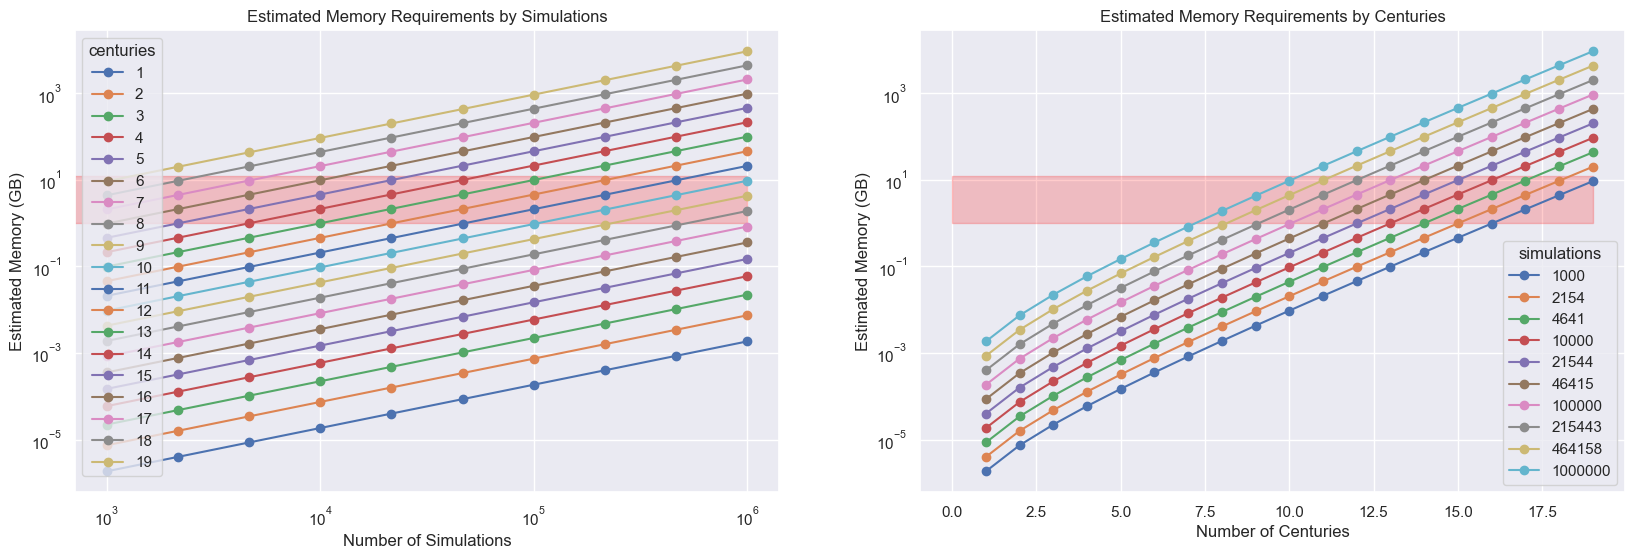

In [11]:
# Plot the estimated simulation times as a function of centuries and n_simulations
from datetime import timedelta
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define ranges for runtime and memory
min_time = timedelta(minutes=1)
max_time = timedelta(minutes=5)
min_memory_gb = 1
max_memory_gb = 12

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot the estimated simulation times as a function of number of simulations
df_simulation_times.reset_index().pivot(index='n_simulations', columns='centuries', values='estimated_runtime_minutes').plot(
  ax=ax1, marker='o')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Number of Simulations')
ax1.set_ylabel('Estimated Runtime (Minutes)')
ax1.set_title('Estimated Simulation Runtime by Simulations')
# Highlight the area where the simulation time within a seconds range
ax1.fill_between([0, max(n_simulations_range)], min_time.seconds/60, max_time.seconds/60, color='red', alpha=0.2)

# Plot the estimated simulation times as a function of number of centuries
df_simulation_times.reset_index().pivot(index='centuries', columns='n_simulations', values='estimated_runtime_minutes').plot(
  ax=ax2, marker='o')

ax2.set_yscale('log')
ax2.set_xlabel('Number of Centuries')
ax2.set_ylabel('Estimated Runtime (Minutes)')
ax2.set_title('Estimated Simulation Runtime by Centuries')
# Highlight the area where the simulation time within a seconds range
ax2.fill_between([0, max(centuries_range)], min_time.seconds/60, max_time.seconds/60, color='red', alpha=0.2)

# Format the legend rounded to the next int
handles, labels = ax2.get_legend_handles_labels()
labels = [str(int(np.ceil(float(label)))) for label in labels]
ax2.legend(handles, labels, title='Simulations')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20, 6))

# Plot the estimated memory requirements as a function of number of simulations
df_simulation_times.reset_index().pivot(index='n_simulations', columns='centuries', values='memory_gb').plot(
  ax=ax3, marker='o')

ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlabel('Number of Simulations')
ax3.set_ylabel('Estimated Memory (GB)')
ax3.set_title('Estimated Memory Requirements by Simulations')
# Highlight the area where the memory requirements are within the given range
ax3.fill_between([0, max(n_simulations_range)], min_memory_gb, max_memory_gb, color='red', alpha=0.2)

# Plot the estimated memory requirements as a function of number of centuries
df_simulation_times.reset_index().pivot(index='centuries', columns='n_simulations', values='memory_gb').plot(
  ax=ax4, marker='o')

ax4.set_yscale('log')
ax4.set_xlabel('Number of Centuries')
ax4.set_ylabel('Estimated Memory (GB)')
ax4.set_title('Estimated Memory Requirements by Centuries')
# Highlight the area where the memory requirements are within the given range
ax4.fill_between([0, max(centuries_range)], min_memory_gb, max_memory_gb, color='red', alpha=0.2)

handles, labels = ax4.get_legend_handles_labels()
labels = [str(int(np.floor(float(label)))) for label in labels]
ax4.legend(handles, labels, title='simulations')

plt.show()

Given these metrics, during development, we'll use:
- 10 centuries
- 1000 simulations

For the final results, we'll use:
- 15 centuries
- 5000 simulations

In [12]:
# Set up the simulation parameters
prod = False
if not prod:
    centuries = 5
    n_simulations = 100
else:
    centuries = 12
    n_simulations = 5000

initial_risk_df = df[['category_alias', 'weighted_geometric_mean']]
categories = df['category_alias'].str.replace('\n', ' ').str.replace(' ', '_').str.lower()
initial_risk_df = initial_risk_df.copy()
initial_risk_df['category'] = categories.values
initial_risk_df = initial_risk_df.set_index('category')
initial_risk_df

,category_alias,weighted_geometric_mean
category,,
ai,AI,0.084158
biorisk,Biorisk,0.000348
climate_change,Climate\nChange,0.001439
dystopia,Dystopia,0.005000
misc,Misc,0.018336
nanotech,Nanotech,0.004811
natural_risks,Natural\nRisks,0.000002
nuclear,Nuclear,0.003007
total_risk,Total\nRisk,0.076293


In [13]:
# Let's run the simulation for total risk.
initial_risk = initial_risk_df.loc['total_risk', 'weighted_geometric_mean'] 
alpha = 0.01

In [14]:
tic = time.time()
# Build the risk tree
tree = build_xrisk_tree(centuries, initial_risk, alpha)
toc = time.time()
tree_build_time = toc - tic

# Run the simulation many times
results = np.zeros((n_simulations, tree.shape[0], tree.shape[1]))
tic = time.time()
for i in range(n_simulations):
    results[i], extinction_centuries = run_survival_simulation(tree)
toc = time.time()
simulation_time = toc - tic

In [15]:
# Process the results
# Add up the results to get the number of times each cell survived
survival_counts = np.sum(results, axis=0)
survival_rates = survival_counts / n_simulations

In [16]:
# Create a dataframe to manipulate the results more easily
df_results = pd.DataFrame(survival_rates, index=range(1, centuries+1))
df_results.to_csv(f'./data/output/simulation_results_{centuries}_{n_simulations}.csv')

In [17]:
# We're interested in the last row, which reflects how many civilizations survived until the end
survival_rate = df_results.iloc[:, -1]

In [18]:
statistics = pd.DataFrame({
  'min_survival_rate': [np.min(survival_rate)],
  'max_survival_rate': [np.max(survival_rate)],
  'mean_survival_rate': [np.mean(survival_rate)],
  'tree_build_time': [tree_build_time],
  'simulation_time': [simulation_time],
  'n_simulations': [n_simulations],
  'centuries': [centuries],
})
statistics

,min_survival_rate,max_survival_rate,mean_survival_rate,tree_build_time,simulation_time,n_simulations,centuries
0,0.81,0.97,0.886,0.000087,0.002851,100,5


In [19]:
# Calculate the total mean probability of survival from the whole tree, including all the simulations
total_mean_survival_rate = np.mean(survival_rates)
total_mean_survival_rate

np.float64(0.7911250000000001)

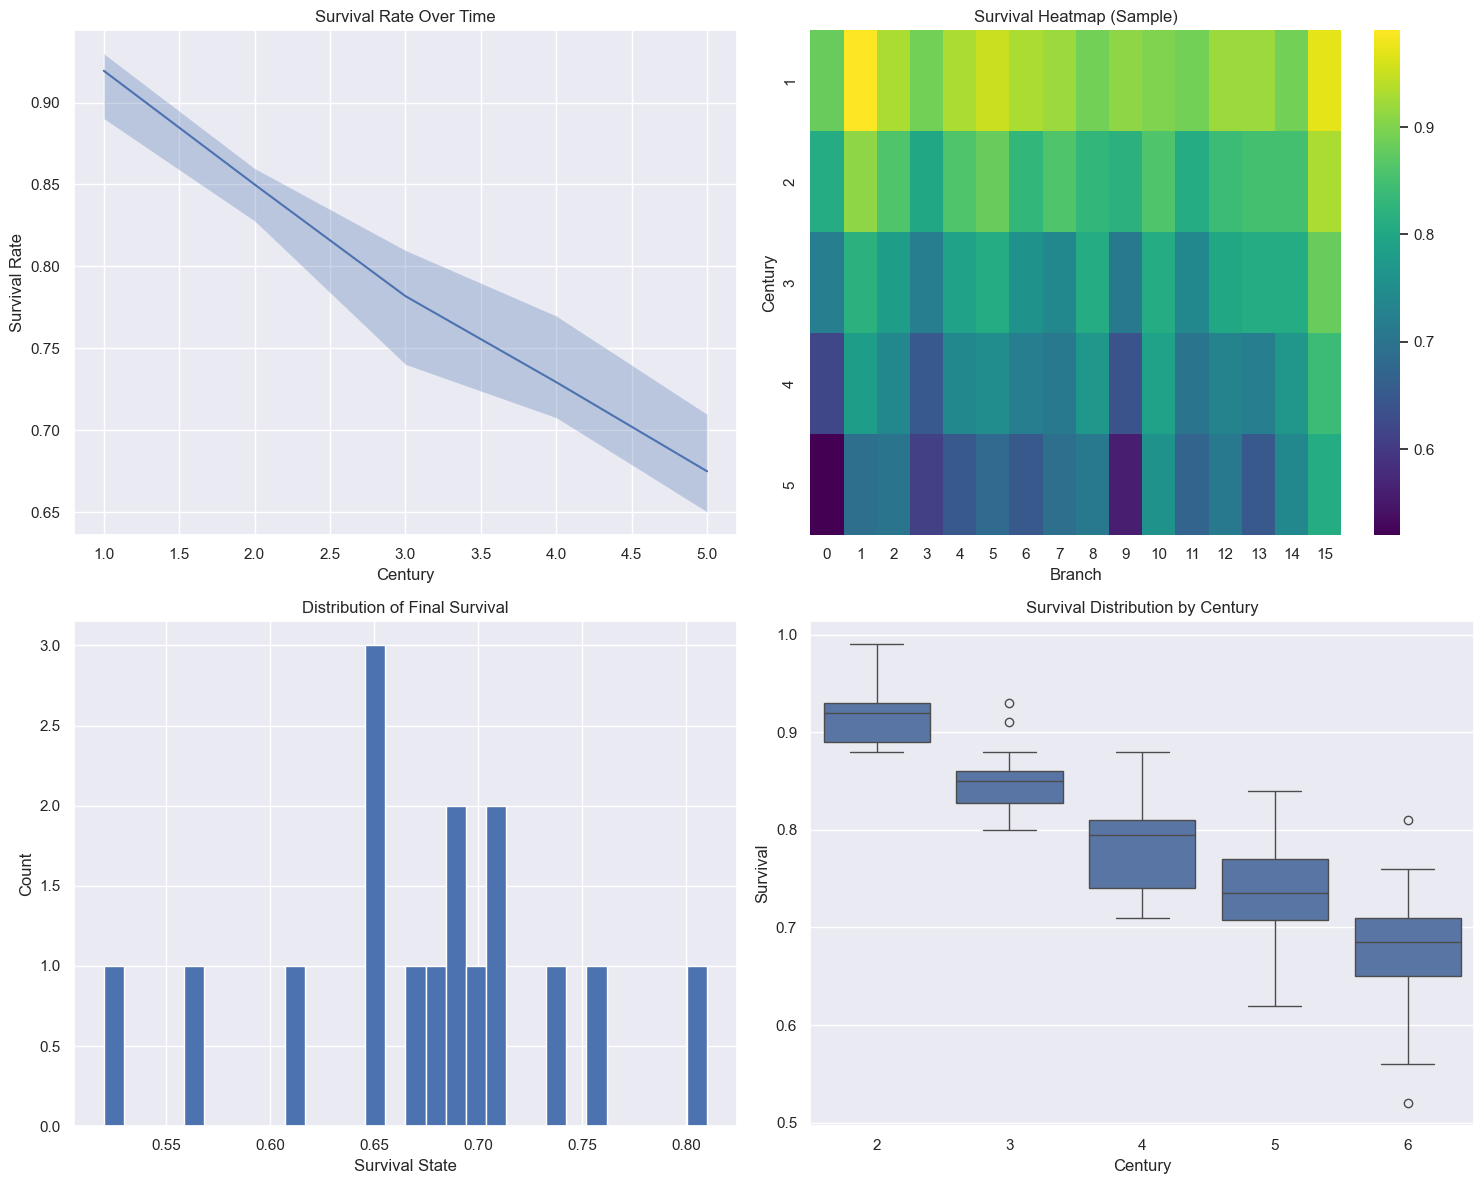

In [20]:
# Generate plots
plot_survival_analysis(df_results)
plt.show()

# Multi-risk Models

The previous scenario modeled risk for a single "total risk". Now, what happens if we consider all risks combined?

We're now going to model multi-risk scenarios in two steps. First, we'll build an independent risk-category model, where every century the extinction game is played for each risk. It's as if we were joining all risk categories with an or statement, and assume that they're mutually exclusive (which they're, most likely, not).

In the second step, we'll build some basic interdependence between risk levels. We'll come up with a correlation matrix between risk levels.


# The Multi-Category Branching Risk Model

While the basic independent risk model provides a foundation, real-world existential risks come from multiple categories (like AI, bio-risks, nuclear threats, etc.) and can change over time. The multi-category branching model captures this complexity.

## Core Concept

The model represents humanity's future as a probability tree where:
- Each node represents a state with specific risk levels for each category
- Each time step (century), the risk levels for each category can either increase or decrease
- The rate of change in risks is controlled by a parameter $\alpha$ (alpha)
- Survival requires avoiding catastrophe from all risk categories

## Model Structure

### Risk Categories
Each state tracks separate risk levels for different categories (e.g., AI, biotech, nuclear). The total existential risk in a state is obtained after multiple simulations, assuming independence between categories.

### State Transitions
From each state, the model creates two possible future states for each risk category:
1. **High-Risk Path**: Risk increases by factor (1 + $\alpha$)
2. **Low-Risk Path**: Risk decreases by factor (1 - $\alpha$)

This creates $2^n$ possible descendant states for n risk categories.

## Key Parameters

1. **Initial Risk Levels** ($p_0$): Starting probabilities for each risk category
2. **Alpha ($\alpha$)**: Controls how quickly risks change
- Larger $\alpha$ means more dramatic changes between centuries
- Smaller $\alpha$ creates more gradual evolution of risks

## Model Dynamics

The branching process creates a tree structure where:
- Each path represents a possible future trajectory
- Risk levels can evolve differently for each category
- Total survival probability considers all possible paths
- Some paths may lead to very high risks while others achieve very low risks

## Advantages Over Basic Model

1. **Category-Specific Tracking**: Allows different dynamics for different types of risks
2. **Risk Evolution**: Captures the possibility of both improvement and degradation
3. **Path Dependence**: Shows how early changes affect long-term outcomes
4. **Policy Insights**: Can evaluate interventions targeting specific risk categories

## Practical Applications

The model helps answer questions like:
1. How do different initial risk levels affect long-term survival?
2. Which risk categories are most critical to address first?
3. What rate of risk reduction ($\alpha$) is needed for good long-term outcomes?
4. How do correlations between risk categories affect overall survival probability?

## Implementation Considerations

When implementing this model, key considerations include:
1. Computational complexity grows exponentially with the number of categories
2. Need to handle very small probabilities carefully
3. May need to prune unlikely branches for computational feasibility
4. Important to track cumulative probabilities along each path

The multi-category branching model provides a richer framework for understanding how humanity might navigate various existential risks over time, while maintaining the mathematical tractability needed for practical analysis.

# Alpha Parameter Selection

We assign different alpha values to each risk category based on their characteristic rates of change and the nature of their driving factors. The initial risks for each category are derived from expert estimates and historical data analysis. Here we select preliminary alpha values to explore model behavior:

* **Artificial Intelligence (initial risk ≈ 8.42%)**: $\alpha$ = 0.04 (4%)
  - Fastest evolving category due to rapid technological advancement
  - High uncertainty and potential for sudden capability jumps
  
* **Biological Risks (initial risk ≈ 0.03%)**: $\alpha$ = 0.025 (2.5%)
  - Moderate-high rate of change due to advancing biotechnology
  - Influenced by both technological progress and natural factors

* **Climate Change (initial risk ≈ 0.14%)**: $\alpha$ = 0.015 (1.5%)
  - Relatively steady progression with some potential tipping points
  - Mix of natural inertia and human technological/policy influences

* **Dystopic Scenarios (initial risk = 0.5%)**: $\alpha$ = 0.01 (1%)
  - Slower evolution tied to societal and governance changes
  - Generally gradual shifts with potential for sudden transitions

* **Miscellaneous Risks (initial risk ≈ 1.83%)**: $\alpha$ = 0.02 (2%)
  - Varied evolution rates averaged across different risk types
  - Moderate value reflecting diverse underlying factors

* **Nanotechnology (initial risk ≈ 0.48%)**: $\alpha$ = 0.03 (3%)
  - Relatively fast evolution due to technological advancement
  - Similar to but slightly slower than AI risk

* **Natural Risks (initial risk ≈ 0.00024%)**: $\alpha$ = 0.005 (0.5%)
  - Most stable category with slowest rate of change
  - Based primarily on geological and astronomical timescales

* **Nuclear Risks (initial risk ≈ 0.30%)**: $\alpha$ = 0.02 (2%)
  - Moderate rate of change tied to geopolitical developments
  - Influenced by both technological and political factors

* **War (initial risk ≈ 2.26%)**: $\alpha$ = 0.025 (2.5%)
  - Relatively rapid changes possible with geopolitical shifts
  - Historical data suggests significant volatility

**Note:** These alpha values are preliminary and meant primarily to explore model behavior and dynamics. While they are vaguely informed by the nature of each risk category and general historical observations, a more rigorous quantification of these parameters would require extensive statistical analysis of historical data, expert elicitation, and detailed time series analysis. Such precise parameter estimation is out of scope for the current phase of this project and will be addressed in future research.

In [21]:
# Use independent multi risk model
categories = df['category_alias'].str.replace('\n', ' ').str.replace(' ', '_').str.lower()
initial_risks = {category: risk for category, risk in zip(categories, df['weighted_geometric_mean'])}

# Exclude total risk, since that one was used in the previous simulation
initial_risks.pop('total_risk', None)

initial_risks

{'ai': 0.0841584836119666,
 'biorisk': 0.0003483985435399,
 'climate_change': 0.0014394658198497,
 'dystopia': 0.005,
 'misc': 0.0183357750149363,
 'nanotech': 0.0048105022530725,
 'natural_risks': 2.4492558758891937e-06,
 'nuclear': 0.0030068361833126,
 'war': 0.0225615968027181}

In [22]:
# Set alpha for each category
alphas = {
    'ai': 0.04,
    'biorisk': 0.025,
    'climate_change': 0.015,
    'dystopia': 0.01,
    'misc': 0.02,
    'nanotech': 0.03,
    'natural_risks': 0.005,
    'nuclear': 0.02,
    'war': 0.025
}

risk_categories = {category: (risk, alphas[category]) for category, risk in initial_risks.items()}
risk_categories

{'ai': (0.0841584836119666, 0.04),
 'biorisk': (0.0003483985435399, 0.025),
 'climate_change': (0.0014394658198497, 0.015),
 'dystopia': (0.005, 0.01),
 'misc': (0.0183357750149363, 0.02),
 'nanotech': (0.0048105022530725, 0.03),
 'natural_risks': (2.4492558758891937e-06, 0.005),
 'nuclear': (0.0030068361833126, 0.02),
 'war': (0.0225615968027181, 0.025)}

In [23]:
# Initialize model
model = MultiRiskBinaryTreeModel(risk_categories=risk_categories, n_centuries=centuries)
experiment = Experiment(model, n_simulations=n_simulations)

In [24]:
# Run experiment with n_simulations
results, extinction_centuries = experiment.run()

In [25]:
# Get stats
stats_df, survival_by_century = experiment.get_stats()
stats_df

,overall_survival_rate,total_simulations,total_extinctions,mean_extinction_century,median_extinction_century,std_extinction_century,earliest_extinction,latest_extinction,q25_extinction_century,q75_extinction_century
0,0.3875,1600,980,1.812245,2.0,1.357313,0.0,4.0,1.0,3.0


In [26]:
survival_by_century

,century,avg_survival,q25_survival,q75_survival
0,1,0.867500,0.8450,0.8900
1,2,0.721875,0.6000,0.8425
2,3,0.593750,0.4125,0.7525
3,4,0.476875,0.2775,0.6525
4,5,0.387500,0.2025,0.5525


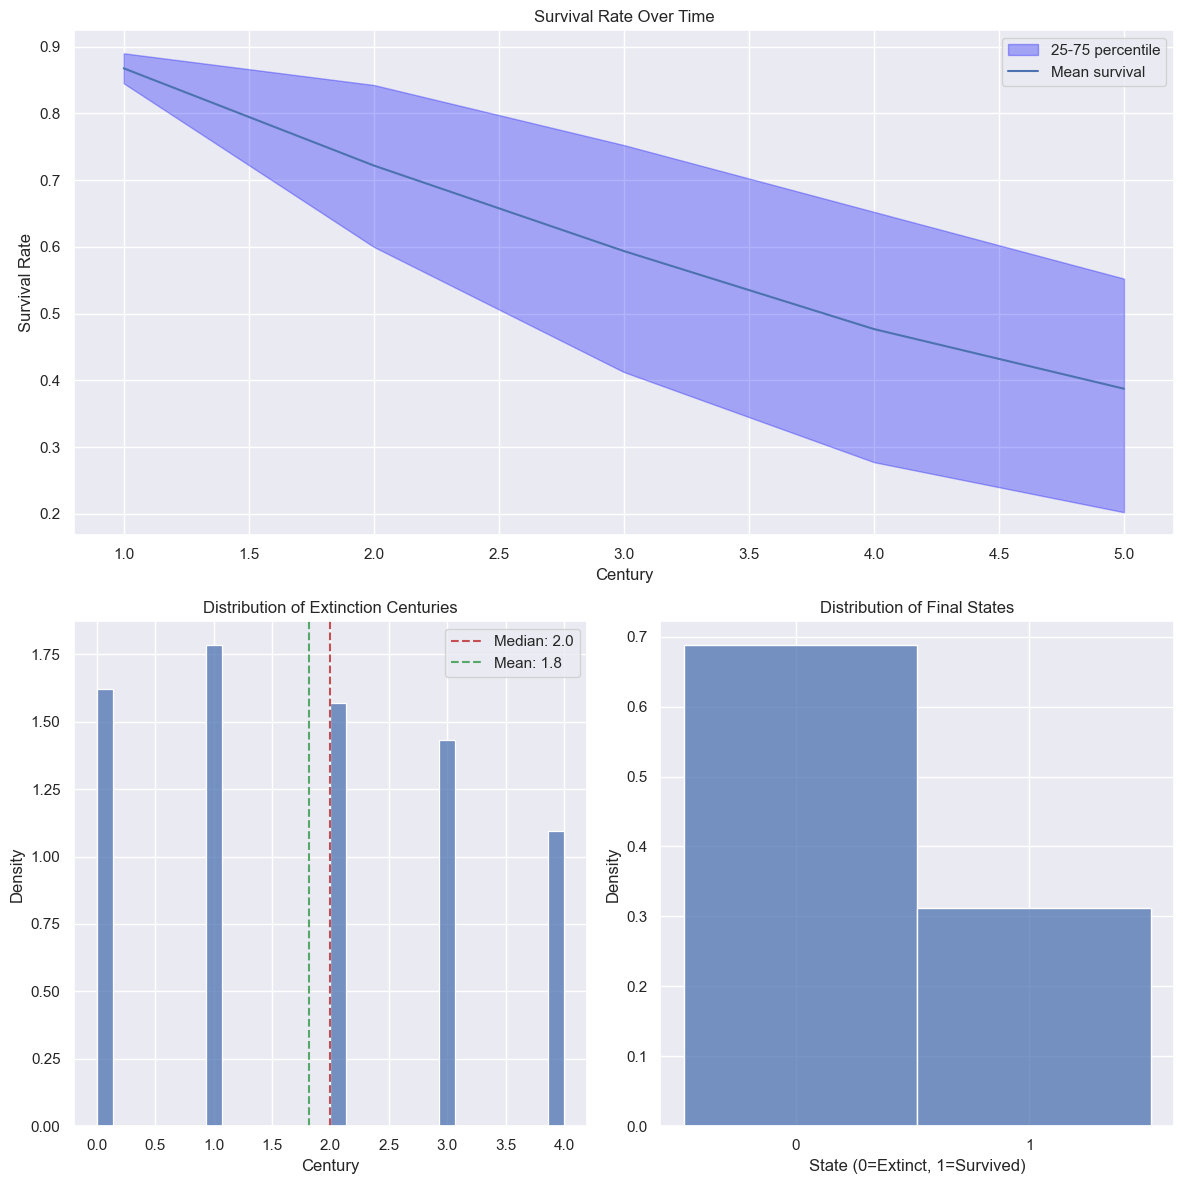

In [27]:
fig = experiment.plot_results()
plt.show()

### Correlated Existential Risks

### Definitions

Let:
- $x_i(t)$ = risk from source $i$ in period $t$
- $X(t)$ = total existential risk in period $t$
- $\rho_{ij}$ = correlation coefficient between risks $i$ and $j$
- $n$ = number of risk sources (6 in our case)
- $\Sigma$ = correlation matrix with entries $\rho_{ij}$

Our risk sources are:
1. AI ($x_1$)
2. Nuclear ($x_2$)
3. Bio ($x_3$)
4. Natural ($x_4$)
5. Climate ($x_5$)
6. Dystopia ($x_6$)

## Base Risk Values (by 2100)
$x_1 = 0.10$ (AI)
$x_2 = 0.01$ (Nuclear)
$x_3 = 0.025$ (Bio)
$x_4 = 0.0001$ (Natural)
$x_5 = 0.001$ (Climate)
$x_6 = 0.05$ (Dystopia)

## Correlation Matrix
$\Sigma = \begin{pmatrix} 
1.0 & 0.3 & 0.4 & -0.3 & 0.2 & 0.7 \\
0.3 & 1.0 & 0.6 & 0.2 & 0.6 & 0.8 \\
0.4 & 0.6 & 1.0 & 0.4 & 0.5 & 0.7 \\
-0.3 & 0.2 & 0.4 & 1.0 & 0.8 & 0.5 \\
0.2 & 0.6 & 0.5 & 0.8 & 1.0 & 0.7 \\
0.7 & 0.8 & 0.7 & 0.5 & 0.7 & 1.0
\end{pmatrix}$

## Single Period Risk

For independent risks:
$X_{ind}(t) = 1 - \prod_{i=1}^n (1 - x_i(t))$

For correlated risks using a Gaussian copula:
$X(t) = 1 - C(1-x_1(t), 1-x_2(t), ..., 1-x_n(t); \Sigma)$

where $C$ is the Gaussian copula:
$C(u_1,...,u_n;\Sigma) = \Phi_\Sigma(\Phi^{-1}(u_1),...,\Phi^{-1}(u_n))$

Here:
- $\Phi_\Sigma$ is the multivariate normal CDF with correlation matrix $\Sigma$
- $\Phi^{-1}$ is the inverse of the standard normal CDF

## Multi-Period Survival

Probability of survival through $T$ periods:
$P(\text{survival through }T\text{ periods}) = \prod_{t=1}^T (1 - X(t))$

Expected survival time:
$E[T] = \sum_{t=1}^{\infty} t \cdot P(\text{survival exactly }t\text{ periods})$

where:
$P(\text{survival exactly }t\text{ periods}) = (1-X(t))^{t-1} \cdot X(t)$